In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score,silhouette_score
import pandas_profiling

In [2]:
train = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train.profile_report()

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

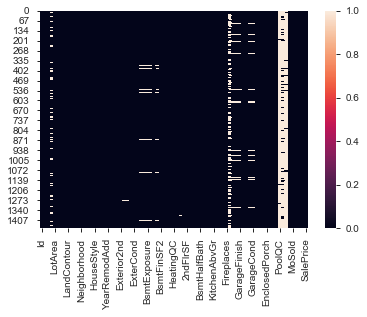

In [7]:
# Checking the mssing values

sns.heatmap(train.isnull())

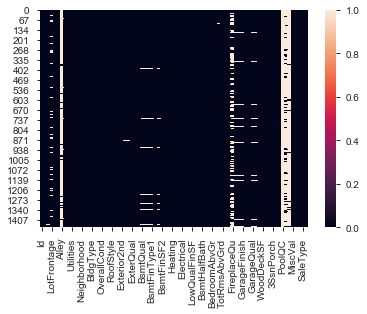

In [16]:
sns.heatmap(test.isnull())

In [17]:
# Describing the data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


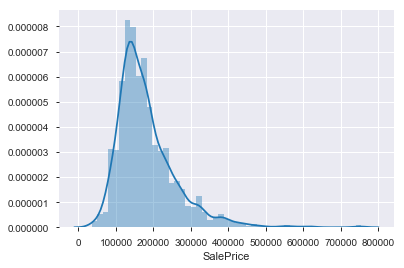

In [18]:
sns.distplot(train.SalePrice)  # without any transformation
# sns.distplot(pd.np.log(train.SalePrice)) # after applying log transformation

In [19]:
# Missing value: Alley

train.Alley.value_counts()

Not Applicable    1369
Grvl                50
Pave                41
Name: Alley, dtype: int64

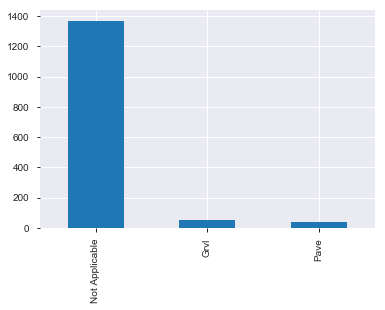

In [20]:
train.Alley.value_counts().plot(kind='bar')

In [21]:
# Most of the Alley has no access to Alley and hence showing NA which means Not Applicable

# Treating Train File

In [8]:
train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [9]:
col = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
       'GarageCond','PoolQC','Fence']

for i in col:
    train[i].fillna("Not Applicable", inplace = True)



In [10]:
train.isnull().sum().sum()

1763

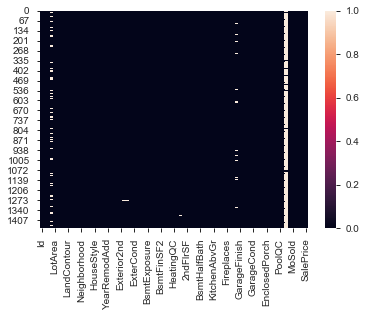

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.columns[train.isnull().sum()>0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt',
       'MiscFeature'],
      dtype='object')

In [50]:
train.MasVnrArea.value_counts()

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [13]:
train.MasVnrArea.fillna(0,inplace=True)

In [14]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [15]:
train.Electrical.fillna('SBrkr',inplace=True)

In [16]:
# Masnry veener Type None and Area as 0
train.MasVnrType.fillna("None", inplace=True)
train.MiscFeature.fillna('None', inplace=True)

In [18]:
train.isnull().sum().sum()

340

In [33]:
train.shape

(1460, 81)

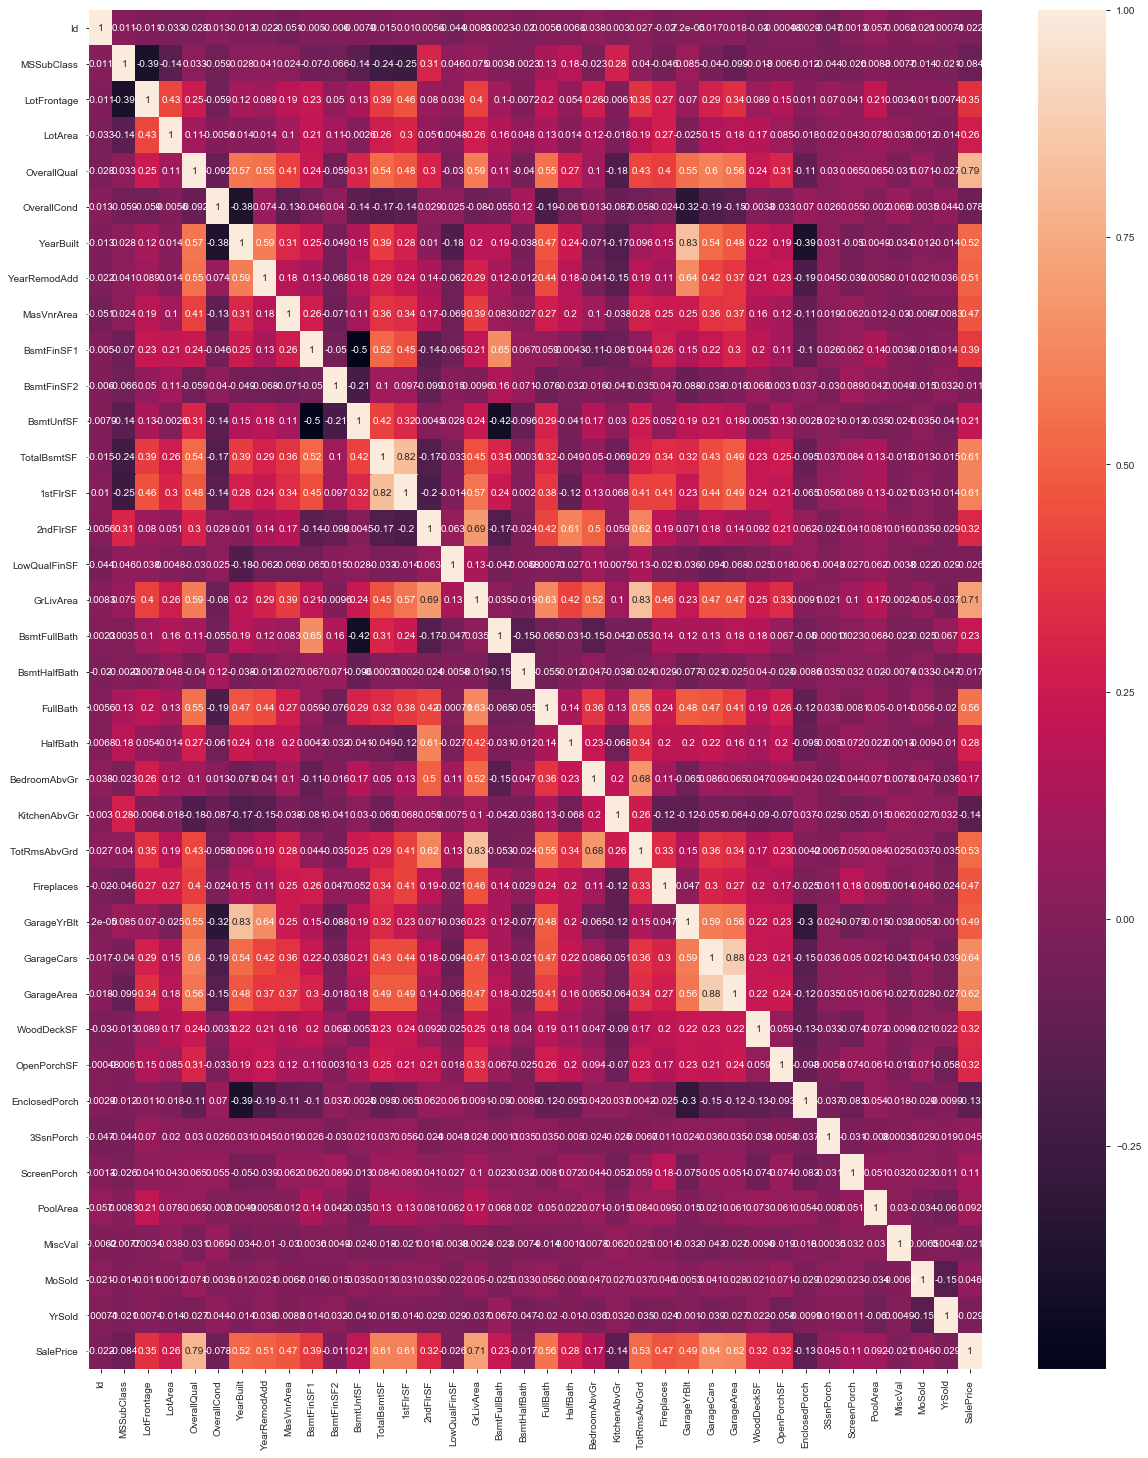

In [41]:
plt.figure(figsize=(20,25))
sns.heatmap(train.corr(),annot=True)

In [19]:
train['LotFrontage'].isnull().sum()

259

In [52]:
train.LotFrontage.value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

In [34]:
train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [35]:
train[train['LotFrontage'].isnull()==False][['LotFrontage','LotArea','LotConfig','LotShape','BldgType','MasVnrArea','MasVnrType',
                                             '1stFlrSF','2ndFlrSF','GrLivArea']].head(15)

,LotFrontage,LotArea,LotConfig,LotShape,BldgType,MasVnrArea,MasVnrType,1stFlrSF,2ndFlrSF,GrLivArea
0,65.0,8450,Inside,Reg,1Fam,196.0,BrkFace,856,854,1710
1,80.0,9600,FR2,Reg,1Fam,0.0,None,1262,0,1262
2,68.0,11250,Inside,IR1,1Fam,162.0,BrkFace,920,866,1786
3,60.0,9550,Corner,IR1,1Fam,0.0,None,961,756,1717
4,84.0,14260,FR2,IR1,1Fam,350.0,BrkFace,1145,1053,2198
5,85.0,14115,Inside,IR1,1Fam,0.0,None,796,566,1362
6,75.0,10084,Inside,Reg,1Fam,186.0,Stone,1694,0,1694
8,51.0,6120,Inside,Reg,1Fam,0.0,None,1022,752,1774
9,50.0,7420,Corner,Reg,2fmCon,0.0,None,1077,0,1077
10,70.0,11200,Inside,Reg,1Fam,0.0,None,1040,0,1040


In [38]:
train[train['LotFrontage'].isnull()==True][['LotFrontage','LotArea','LotShape','LotConfig']].head(10)

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside
31,NaN,8544,IR1,CulDSac
42,NaN,9180,IR1,CulDSac
43,NaN,9200,IR1,CulDSac
50,NaN,13869,IR2,Corner
64,NaN,9375,Reg,Inside


In [22]:
df_lot_frontage = train[train['LotFrontage'].isnull()==False]
df_lot_frontage.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Applicable,Not Applicable,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Applicable,Not Applicable,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Applicable,Not Applicable,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Applicable,Not Applicable,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Applicable,Not Applicable,None,0,12,2008,WD,Normal,250000


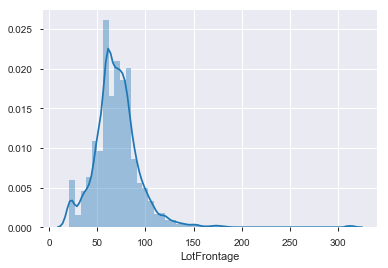

In [78]:
sns.distplot(df_lot_frontage['LotFrontage'])

In [79]:
df_lot_frontage['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
train.LotFrontage.fillna()

In [58]:
round(train[train['LotFrontage'].isnull()==False]['LotFrontage'].mode())

0    60.0
dtype: float64

In [57]:
pd.DataFrame(train.LotFrontage.value_counts().head(7))

,LotFrontage
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
65.0,44
85.0,40


In [59]:
train.LotFrontage.fillna(60, inplace=True)

In [81]:
train[train['GarageYrBlt'].isnull()==False][['GarageYrBlt','YearBuilt']].head(10)

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
5,1993.0,1993
6,2004.0,2004
7,1973.0,1973
8,1931.0,1931
9,1939.0,1939


In [78]:
train[train['GarageYrBlt'] == train['YearBuilt']][['GarageYrBlt','YearBuilt']].shape

(1089, 2)

In [79]:
train.shape

(1460, 81)

In [115]:
train['GarageYrBlt'].where(train.GarageYrBlt.notnull(),train['YearBuilt'], axis=0, inplace=True)
# train.isnull().sum().sum()

In [116]:
train.GarageYrBlt.isnull().sum()

0

In [118]:
train.isnull().sum().sum()

0

# test file treatment

In [119]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [120]:
test.shape

(1459, 80)

In [122]:
test.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [124]:
col = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
       'GarageCond','PoolQC','Fence']

for i in col:
    test[i].fillna("Not Applicable", inplace = True)



In [125]:
test.isnull().sum().sum()

1766

In [170]:
test.columns[test.isnull().sum()>0]

Index(['KitchenQual', 'Functional', 'SaleType'], dtype='object')

In [172]:
test[['KitchenQual', 'Functional', 'SaleType']].isnull().sum()

KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [141]:
# Masnry veener Type None and Area as 0
test.MasVnrType.fillna("None", inplace=True)
test.MiscFeature.fillna('None', inplace=True)

In [143]:
round(test[test['LotFrontage'].isnull()==False]['LotFrontage'].mode())

0    60.0
dtype: float64

In [145]:
test[test['LotFrontage'].isnull()==False]['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [146]:
test.LotFrontage.value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
22.0       1
136.0      1
149.0      1
31.0       1
131.0      1
Name: LotFrontage, Length: 115, dtype: int64

In [147]:
test.LotFrontage.fillna(60, inplace=True)

In [148]:
test['GarageYrBlt'].where(test.GarageYrBlt.notnull(),test['YearBuilt'], axis=0, inplace=True)

In [149]:
test.isnull().sum().sum()

37

In [168]:
test.Utilities.fillna('AllPub', inplace= True)
test.Exterior1st.fillna('VinylSd', inplace=True)
test.Exterior2nd.fillna('VinylSd', inplace=True)
test.MasVnrArea.fillna(0, inplace=True)
test.MSZoning.fillna('RL', inplace=True)
test.GarageArea.fillna(0, inplace=True)

In [169]:
test.BsmtFinSF1.fillna(0, inplace=True)
test.BsmtFinSF2.fillna(0, inplace=True)
test.TotalBsmtSF.fillna(0, inplace=True)
test.BsmtUnfSF.fillna(0, inplace=True)
test.BsmtFullBath.fillna(0, inplace=True)
test.BsmtHalfBath.fillna(0, inplace=True)
test.GarageCars.fillna(2, inplace=True)

In [179]:
for i in ['Functional', 'KitchenQual','SaleType']:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [180]:
test.isnull().sum().sum()

0

In [181]:
test.shape

(1459, 80)

In [182]:
train.shape

(1460, 81)

# Converting into Dummies

In [183]:
dummiestrain = pd.get_dummies(train.drop(["Id"], axis=1))
dummiestest = pd.get_dummies(test.drop(["Id"], axis=1))

In [184]:
dummiestest.shape

(1459, 284)

In [185]:
dummiestrain.shape

(1460, 303)

# Applying K-Means Clustering to the original Dataset

In [186]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
train[train]

In [191]:
col = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [202]:
num_cols = []
for i in col:
    if(train[i].dtype != 'object'):
        num_cols.append(i)

In [204]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [211]:
cluster_train = train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                        'MiscVal']]

In [212]:
cluster_train.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0
1,2,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0
2,3,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0
3,4,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1915.0,3,642,0,35,272,0,0,0,0
4,5,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0


In [213]:
sil=[]
wcss=[]
for i in range(2,11):
    k = KMeans(n_clusters=i)
    model = k.fit(cluster_train).predict(cluster_train)
    wcss.append(k.inertia_)
    sil.append(silhouette_score(cluster_train,model))

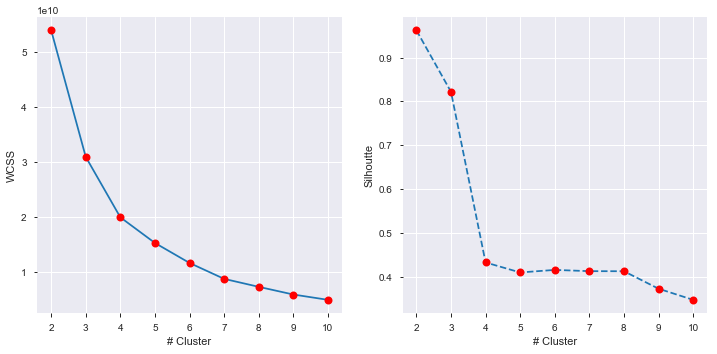

In [214]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(range(2,11),wcss,'-o', markerfacecolor = "red", markersize = 8)
plt.xlabel('# Cluster')
plt.ylabel('WCSS')


plt.subplot(222)
plt.plot(range(2,11),sil,'-o', markerfacecolor = "red", markersize = 8, linestyle='dashed')
plt.xlabel('# Cluster')
plt.ylabel('Silhoutte')
plt.show()

## optimal clusters = 4

In [216]:
k1 = KMeans(n_clusters=4)
model1 = k1.fit(cluster_train).predict(cluster_train)

In [222]:
dummiestest.shape

(1459, 284)

In [223]:
dummiestrain.shape

(1460, 303)

In [226]:
X = dummiestrain.drop('SalePrice',axis=1)
y = dummiestrain.SalePrice


In [71]:
# Dropping Garage year from train and test

# newtrain = train.drop(['Id','GarageYrBlt'],axis=1)
# newtest = test.drop(['Id','GarageYrBlt'],axis=1)

# Scaling the Data

In [227]:
from sklearn.preprocessing import StandardScaler

In [228]:
sc = StandardScaler()

In [230]:
scaledtrain = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [231]:
scaledtest = pd.DataFrame(sc.fit_transform(dummiestest), columns=dummiestest.columns)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Applying PCA

In [292]:
from sklearn.decomposition import PCA
pca = PCA()

In [293]:
pca_tr=pca.fit_transform(scaledtrain)

In [294]:
pca_te=pca.fit_transform(scaledtest)

In [295]:
# Finding the No of Components
sum(np.cumsum(pca.explained_variance_ratio_)<=0.97)

183

In [296]:
# Tune the PCA as per the Components 170
pca = PCA(n_components=183)

In [297]:
# PCA the Train and Test
pca_train = pca.fit_transform(scaledtrain)

In [298]:
pca_test = pca.fit_transform(scaledtest)

# Applying Various Models

## Linear Regression

In [232]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [244]:
lm.fit(pca_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [245]:
lm_pred = lm.predict(pca_test)

In [246]:
lm_pred

array([136668.7005687 , 208435.85878644, 187625.31652753, ...,
       154389.31627116, 151733.64579785, 234921.15495422])

In [249]:
# Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":lm_pred})

In [250]:
# Export to Kaggle
solution.to_csv("LR Model.csv", index = False) # 0.50124

In [247]:
cd

C:\Users\SUSHANT


In [251]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [252]:
# Initiate the Machines
dtree = DecisionTreeRegressor()
bagg=BaggingRegressor()
ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()
rf = RandomForestRegressor()

# Decision Tree Model

In [253]:
dtree_pred = dtree.fit(pca_train,y).predict(pca_test)

In [254]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":dtree_pred})

# Export to Kaggle
solution.to_csv("TREE Model.csv", index = False) # 0.26186

# Random Forest Model

In [299]:
rf_pred = rf.fit(pca_train,y).predict(pca_test)

In [300]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":rf_pred})

# Export to Kaggle
solution.to_csv("RF Model2.csv", index = False) # 0.19797(170) - 0.19823(144)  - 0.19839(183)

# Bagging

In [259]:
bagg_pred = bagg.fit(pca_train,y).predict(pca_test)

In [260]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":bagg_pred})

# Export to Kaggle
solution.to_csv("Bagging Model.csv", index = False) # 0.20022

# AdaBoost

In [261]:
ada_pred = ada.fit(pca_train,y).predict(pca_test)

In [262]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":ada_pred})

# Export to Kaggle
solution.to_csv("Ada Model.csv", index = False) # 0.23398

# Ada Boost with RandomForest

In [263]:
ada_rf = AdaBoostRegressor(base_estimator=rf)
ada_rf_pred = ada_rf.fit(pca_train,y).predict(pca_test)

In [265]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":ada_rf_pred})

# Export to Kaggle
solution.to_csv("Ada RF Model.csv", index = False) # 0.18918

# Gradient Boosting

In [266]:
gbm_pred = gbm.fit(pca_train,y).predict(pca_test)

In [268]:
# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":gbm_pred})

# Export to Kaggle
solution.to_csv("GBM Model.csv", index = False) # 0.19555

# Tuning Adaboost with Random Forest

In [269]:
tree_params = {"base_estimator":[rf], 
              "n_estimators":[25,50,75,100],
              "learning_rate":[1,2,3],
              "random_state":[1,12,123]}

In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
# Initiated the Machine
grid = GridSearchCV(estimator=ada_rf,param_grid=tree_params, cv=5)

In [272]:
grid.fit(pca_train, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_wei...tart=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction...alse)], 'n_estimators': [25, 50, 75, 100], 'learning_rate': [1, 2, 3], 'random_state': [1, 12, 123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
    

In [273]:
grid.best_params_

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'learning_rate': 1,
 'n_estimators': 75,
 'random_state': 123}

In [274]:
ada = AdaBoostRegressor(base_estimator= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 learning_rate=1,n_estimators=100,random_state= 123)

In [276]:
tunned_pred = ada.fit(pca_train,y).predict(pca_test)

# Preparing Data For Submission
solution = pd.DataFrame({"Id":test.Id, "SalePrice":tunned_pred})

# Export to Kaggle
solution.to_csv("AdaRF Tunned Model.csv", index = False)  #0.18994